In [21]:
# calling various libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [22]:
df=pd.read_csv("heart_disease.csv")
df.head()

,Age,Sex,CP,Trestbps,chol,fbs,resting,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140,260,0,1,112,1,3,2,?,?,2
1,44,1,4,130,209,0,1,127,0,0,?,?,?,0
2,60,1,4,132,218,0,1,140,1,1.5,3,?,?,2
3,55,1,4,142,228,0,1,149,1,2.5,1,?,?,1
4,66,1,3,110,213,1,2,99,1,1.3,2,?,?,0


In [23]:
df['num'].unique()

array([2, 0, 1, 3, 4], dtype=int64)

In [24]:
df['num'].value_counts()

1    56
0    51
3    42
2    41
4    10
Name: num, dtype: int64

In [25]:
df=pd.read_csv("heart_disease.csv",na_values="?")           # replacing the "?" with NaN values
df.head()

,Age,Sex,CP,Trestbps,chol,fbs,resting,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0


In [26]:
target=[]
for value in df['num']:
    if value>=1:
        target.append("Yes")
    else:
        target.append("No")
df['Target']=target
print(df)

     Age  Sex  CP  Trestbps   chol  fbs  resting  thalach  exang  oldpeak  \
0     63    1   4     140.0  260.0  0.0        1    112.0    1.0      3.0   
1     44    1   4     130.0  209.0  0.0        1    127.0    0.0      0.0   
2     60    1   4     132.0  218.0  0.0        1    140.0    1.0      1.5   
3     55    1   4     142.0  228.0  0.0        1    149.0    1.0      2.5   
4     66    1   3     110.0  213.0  1.0        2     99.0    1.0      1.3   
..   ...  ...  ..       ...    ...  ...      ...      ...    ...      ...   
195   54    0   4     127.0  333.0  1.0        1    154.0    0.0      0.0   
196   62    1   1       NaN  139.0  0.0        1      NaN    NaN      NaN   
197   55    1   4     122.0  223.0  1.0        1    100.0    0.0      0.0   
198   58    1   4       NaN  385.0  1.0        2      NaN    NaN      NaN   
199   62    1   2     120.0  254.0  0.0        2     93.0    1.0      0.0   

     slope  ca  thal  num Target  
0      2.0 NaN   NaN    2    Yes  
1    

In [27]:
df.head()

,Age,Sex,CP,Trestbps,chol,fbs,resting,thalach,exang,oldpeak,slope,ca,thal,num,Target
0,63,1,4,140.0,260.0,0.0,1,112.0,1.0,3.0,2.0,NaN,NaN,2,Yes
1,44,1,4,130.0,209.0,0.0,1,127.0,0.0,0.0,NaN,NaN,NaN,0,No
2,60,1,4,132.0,218.0,0.0,1,140.0,1.0,1.5,3.0,NaN,NaN,2,Yes
3,55,1,4,142.0,228.0,0.0,1,149.0,1.0,2.5,1.0,NaN,NaN,1,Yes
4,66,1,3,110.0,213.0,1.0,2,99.0,1.0,1.3,2.0,NaN,NaN,0,No


In [28]:
df.shape

(200, 15)

In [29]:
df.tail()

,Age,Sex,CP,Trestbps,chol,fbs,resting,thalach,exang,oldpeak,slope,ca,thal,num,Target
195,54,0,4,127.0,333.0,1.0,1,154.0,0.0,0.0,NaN,NaN,NaN,1,Yes
196,62,1,1,NaN,139.0,0.0,1,NaN,NaN,NaN,NaN,NaN,NaN,0,No
197,55,1,4,122.0,223.0,1.0,1,100.0,0.0,0.0,NaN,NaN,6.0,2,Yes
198,58,1,4,NaN,385.0,1.0,2,NaN,NaN,NaN,NaN,NaN,NaN,0,No
199,62,1,2,120.0,254.0,0.0,2,93.0,1.0,0.0,NaN,NaN,NaN,1,Yes


In [30]:
df.isnull().sum()

Age           0
Sex           0
CP            0
Trestbps     56
chol          7
fbs           7
resting       0
thalach      53
exang        53
oldpeak      56
slope       102
ca          198
thal        166
num           0
Target        0
dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       200 non-null    int64  
 1   Sex       200 non-null    int64  
 2   CP        200 non-null    int64  
 3   Trestbps  144 non-null    float64
 4   chol      193 non-null    float64
 5   fbs       193 non-null    float64
 6   resting   200 non-null    int64  
 7   thalach   147 non-null    float64
 8   exang     147 non-null    float64
 9   oldpeak   144 non-null    float64
 10  slope     98 non-null     float64
 11  ca        2 non-null      float64
 12  thal      34 non-null     float64
 13  num       200 non-null    int64  
 14  Target    200 non-null    object 
dtypes: float64(9), int64(5), object(1)
memory usage: 23.6+ KB


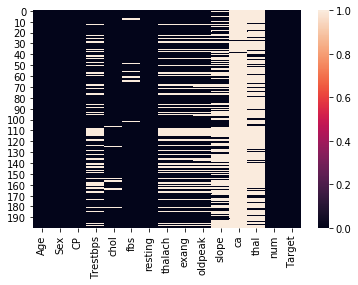

In [32]:
sns.heatmap(df.isnull())

In [33]:
# Summary Statistics
df.describe()

,Age,Sex,CP,Trestbps,chol,fbs,resting,thalach,exang,oldpeak,slope,ca,thal,num
count,200.000000,200.000000,200.000000,144.000000,193.000000,193.000000,200.000000,147.000000,147.000000,144.000000,98.000000,2.0,34.000000,200.000000
mean,59.350000,0.970000,3.505000,133.763889,178.746114,0.352332,0.735000,122.795918,0.646259,1.320833,2.132653,0.0,6.294118,1.520000
std,7.811697,0.171015,0.795701,21.537733,114.035232,0.478939,0.683455,21.990328,0.479765,1.106236,0.667937,0.0,1.291685,1.219441
min,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,-0.500000,1.000000,0.0,3.000000,0.000000
25%,55.000000,1.000000,3.000000,120.000000,0.000000,0.000000,0.000000,109.000000,0.000000,0.000000,2.000000,0.0,6.000000,0.000000
50%,60.000000,1.000000,4.000000,130.000000,216.000000,0.000000,1.000000,120.000000,1.000000,1.500000,2.000000,0.0,7.000000,1.000000
75%,64.000000,1.000000,4.000000,147.000000,258.000000,1.000000,1.000000,140.000000,1.000000,2.000000,3.000000,0.0,7.000000,3.000000
max,77.000000,1.000000,4.000000,190.000000,458.000000,1.000000,2.000000,180.000000,1.000000,4.000000,3.000000,0.0,7.000000,4.000000


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 14 Text xticklabel objects>)

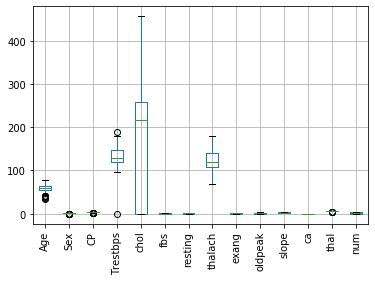

In [34]:
df.boxplot()
plt.xticks(rotation="vertical")

<Figure size 576x576 with 0 Axes>

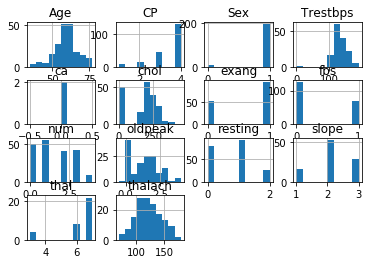

In [35]:
plt.figure(figsize=(8,8))
df.hist()
plt.show()

In [36]:
# plotting outliers
collist=df.columns.values
ncol=12
nrows=10

In [37]:
collist

array(['Age', 'Sex', 'CP', 'Trestbps', 'chol', 'fbs', 'resting',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num',
       'Target'], dtype=object)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

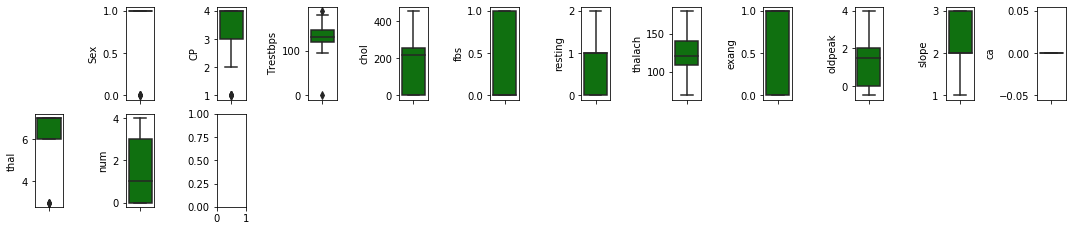

In [38]:
plt.figure(figsize=(15,15))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

In [39]:
# To check correlation
df.corr()

,Age,Sex,CP,Trestbps,chol,fbs,resting,thalach,exang,oldpeak,slope,ca,thal,num
Age,1.000000,0.034230,-0.038280,0.210980,0.069138,0.127817,0.002400,-0.174125,0.156823,0.183086,0.148603,NaN,0.176430,0.287289
Sex,0.034230,1.000000,0.038036,0.013820,-0.096204,-0.055372,0.060621,-0.001747,0.018155,0.106811,0.124613,NaN,-0.138675,0.147470
CP,-0.038280,0.038036,1.000000,0.097246,0.066279,-0.047701,0.034790,-0.160306,0.235935,0.055933,0.047762,NaN,0.213339,0.168210
Trestbps,0.210980,0.013820,0.097246,1.000000,0.176922,0.226024,0.106918,-0.013177,0.222550,0.118022,0.109788,NaN,0.230130,0.172577
chol,0.069138,-0.096204,0.066279,0.176922,1.000000,0.160850,0.025154,-0.048269,0.102016,0.001549,0.080450,NaN,-0.171315,0.077999
fbs,0.127817,-0.055372,-0.047701,0.226024,0.160850,1.000000,0.167657,0.061682,-0.259299,-0.122122,0.023457,NaN,0.059924,0.051012
resting,0.002400,0.060621,0.034790,0.106918,0.025154,0.167657,1.000000,0.014274,-0.093141,-0.123890,-0.027817,NaN,0.110871,-0.032800
thalach,-0.174125,-0.001747,-0.160306,-0.013177,-0.048269,0.061682,0.014274,1.000000,-0.075057,0.179167,-0.164124,NaN,-0.414599,-0.094392
exang,0.156823,0.018155,0.235935,0.222550,0.102016,-0.259299,-0.093141,-0.075057,1.000000,0.314143,0.149392,NaN,0.258353,0.304296
oldpeak,0.183086,0.106811,0.055933,0.118022,0.001549,-0.122122,-0.123890,0.179167,0.314143,1.000000,0.331319,NaN,0.209410,0.457514


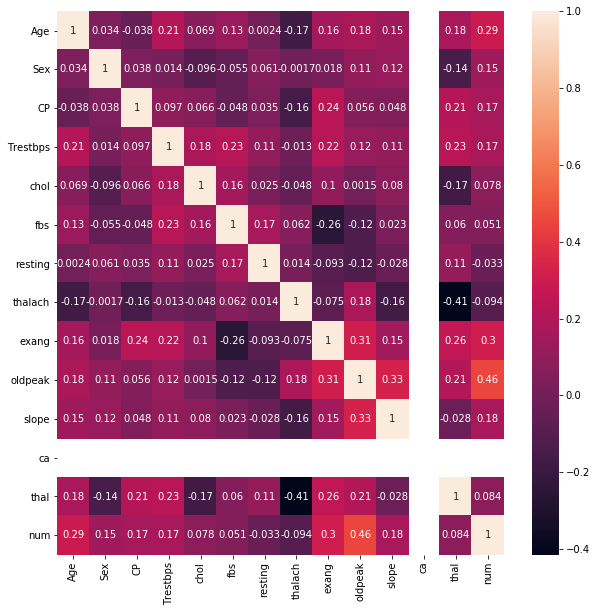

In [40]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [41]:
# There are 7 columns which have missing values.
# first I drop that columns which have more than 50% of missing value i.e. "ca","thal","slop"
# I drop these column because with only 50% of data we can'nt predict the right things.
df.drop(['ca','thal','slope','num'],axis=1,inplace=True)

In [42]:
df.isnull().sum()

Age          0
Sex          0
CP           0
Trestbps    56
chol         7
fbs          7
resting      0
thalach     53
exang       53
oldpeak     56
Target       0
dtype: int64

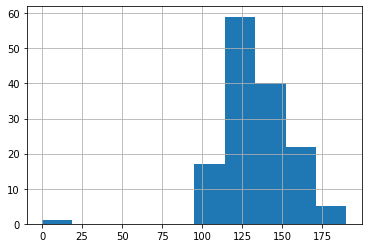

In [43]:
df['Trestbps'].hist()

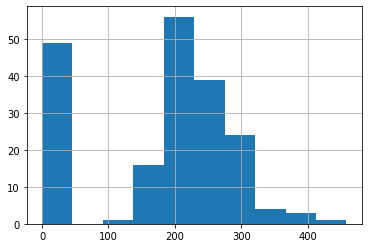

In [44]:
df["chol"].hist()

{'whiskers': [<matplotlib.lines.Line2D at 0x234846ead88>,
 'caps': [<matplotlib.lines.Line2D at 0x234846eae88>,
 'boxes': [<matplotlib.lines.Line2D at 0x234846e48c8>],
 'medians': [<matplotlib.lines.Line2D at 0x23484c0ddc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x23483e97a88>],
 'means': []}

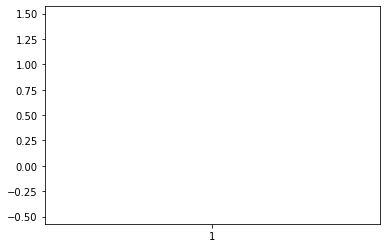

In [45]:
plt.boxplot(df['chol'])

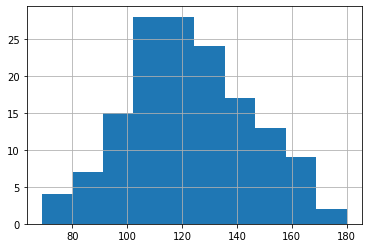

In [46]:
df['thalach'].hist()

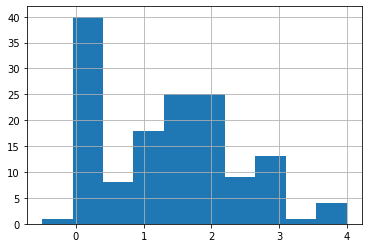

In [47]:
df['oldpeak'].hist()

In [48]:
# Filling the missing categorical values with mean,median and mode
df["Trestbps"].fillna(df['Trestbps'].median(),inplace=True)  # because data has right skewed
df['chol'].fillna(df['chol'].mean(),inplace=True)
df['thalach'].fillna(df['thalach'].mean(),inplace=True)
df['oldpeak'].fillna(df['oldpeak'].mean(),inplace=True)

In [49]:
print(df['exang'].mode())
print(df['fbs'].mode())

0    1.0
dtype: float64
0    0.0
dtype: float64


In [50]:
df['exang'].fillna(df['exang'].mode(),inplace=True)
df['fbs'].fillna(df['fbs'].mode(),inplace=True)

In [51]:
df.isnull().sum()

Age          0
Sex          0
CP           0
Trestbps     0
chol         0
fbs          7
resting      0
thalach      0
exang       53
oldpeak      0
Target       0
dtype: int64

In [52]:
df['exang'].value_counts()

1.0    95
0.0    52
Name: exang, dtype: int64

In [53]:
df['exang'].replace(np.NaN,1,inplace=True)

In [54]:
df.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
chol        0
fbs         7
resting     0
thalach     0
exang       0
oldpeak     0
Target      0
dtype: int64

In [55]:
df['fbs'].value_counts()

0.0    125
1.0     68
Name: fbs, dtype: int64

In [56]:
df['fbs'].replace(np.NaN,0.0,inplace=True)

In [57]:
df.isnull().sum()

Age         0
Sex         0
CP          0
Trestbps    0
chol        0
fbs         0
resting     0
thalach     0
exang       0
oldpeak     0
Target      0
dtype: int64

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       200 non-null    int64  
 1   Sex       200 non-null    int64  
 2   CP        200 non-null    int64  
 3   Trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    float64
 6   resting   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    float64
 9   oldpeak   200 non-null    float64
 10  Target    200 non-null    object 
dtypes: float64(6), int64(4), object(1)
memory usage: 17.3+ KB


In [59]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Target']=le.fit_transform(df['Target'])


In [60]:
df['Target'].head()

0    1
1    0
2    1
3    1
4    0
Name: Target, dtype: int32

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       200 non-null    int64  
 1   Sex       200 non-null    int64  
 2   CP        200 non-null    int64  
 3   Trestbps  200 non-null    float64
 4   chol      200 non-null    float64
 5   fbs       200 non-null    float64
 6   resting   200 non-null    int64  
 7   thalach   200 non-null    float64
 8   exang     200 non-null    float64
 9   oldpeak   200 non-null    float64
 10  Target    200 non-null    int32  
dtypes: float64(6), int32(1), int64(4)
memory usage: 16.5 KB


In [62]:
#Removing OutLiers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[4.68420533e-01, 1.75863115e-01, 6.23653755e-01, ...,
        5.92748978e-01, 1.79511750e+00, 5.85048613e-01],
       [1.96993293e+00, 1.75863115e-01, 6.23653755e-01, ...,
        1.68705478e+00, 1.41204031e+00, 1.70925967e+00],
       [8.34173552e-02, 1.75863115e-01, 6.23653755e-01, ...,
        5.92748978e-01, 1.91538592e-01, 5.85048613e-01],
       ...,
       [5.58254608e-01, 1.75863115e-01, 6.23653755e-01, ...,
        1.68705478e+00, 1.41204031e+00, 5.85048613e-01],
       [1.73251430e-01, 1.75863115e-01, 6.23653755e-01, ...,
        5.92748978e-01, 2.37377363e-16, 1.70925967e+00],
       [3.40086140e-01, 1.75863115e-01, 1.89615940e+00, ...,
        5.92748978e-01, 1.41204031e+00, 5.85048613e-01]])

In [63]:
threshold=3
print(np.where(z>3))

(array([ 24,  33,  51,  66,  70,  72,  76,  79,  96,  97, 126, 128, 131,
       133, 137, 176, 190, 195, 196], dtype=int64), array([7, 3, 1, 2, 7, 2, 2, 1, 0, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2],
      dtype=int64))


In [64]:
df_new=df[(z<3).all(axis=1)]

In [65]:
print(df.shape)
print(df_new.shape)

(200, 11)
(181, 11)


(0, 1.126765408595326)

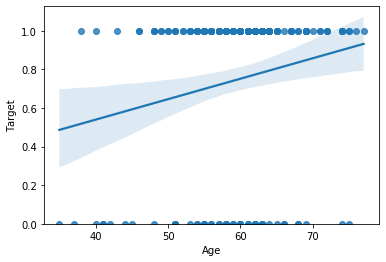

In [66]:
sns.regplot(x='Age',y="Target",data=df)
plt.ylim(0,)

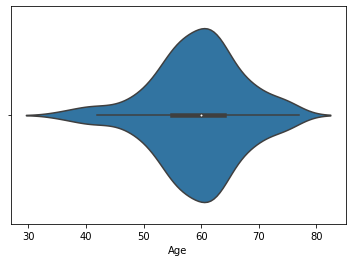

In [67]:
sns.violinplot(x='Age',data=df)
plt.show()

In [68]:
# According to above visualization, age between 55 to 65 have max value of having heart disease.

In [69]:
# Lets categories age into "young_age","middle_age" and "old_age"
young_age=df[(df.Age>=29)&(df.Age<40)]
middle_age=df[(df.Age>=40)&(df.Age<55)]
old_age=df[(df.Age>55)]
print("Young Age :",len(young_age))
print("Middle Age :",len(middle_age))
print("Old Age :",len(old_age))

Young Age : 3
Middle Age : 39
Old Age : 144


In [70]:
df['Sex'].value_counts()

1    194
0      6
Name: Sex, dtype: int64

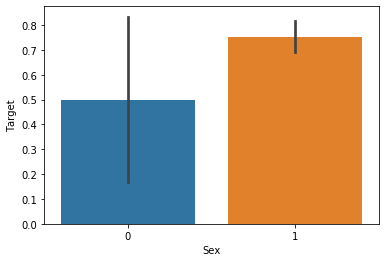

In [71]:
sns.barplot(x="Sex",y="Target",data=df)
plt.show()

<Figure size 1440x1080 with 0 Axes>

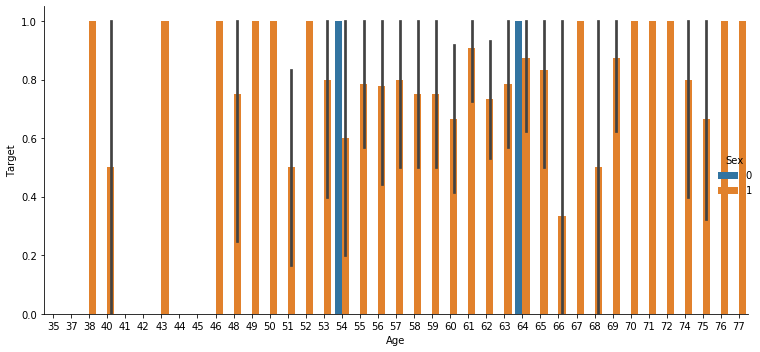

In [72]:
plt.figure(figsize=(20,15))
sns.catplot(x="Age",y="Target",hue="Sex",data=df,kind="bar",size=5,aspect=2)
plt.tight_layout()

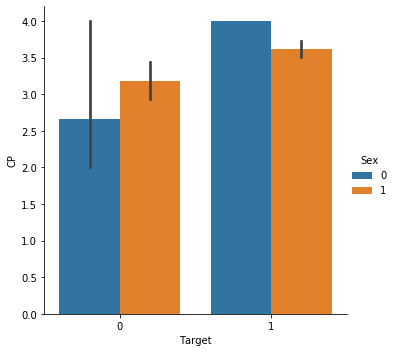

In [73]:
sns.catplot(y="CP",x='Target',hue='Sex',kind='bar',data=df)
plt.show()

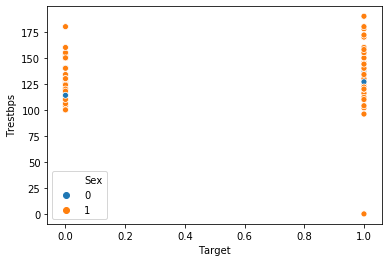

In [74]:
sns.scatterplot(y="Trestbps",x='Target',hue='Sex',data=df)
plt.show()

# Separating the target and input variable

In [75]:
x=df_new.iloc[:,:-1]
y=pd.DataFrame(df_new.iloc[:,-1])
print(x.shape)
print(y.shape)


(181, 10)
(181, 1)


In [76]:
#checking skewness
x.skew()

Age        -0.341400
Sex         0.000000
CP         -1.414098
Trestbps    0.698089
chol       -0.546859
fbs         0.748785
resting     0.386145
thalach    -0.064362
exang      -1.207866
oldpeak     0.445245
dtype: float64

In [77]:
# fbs and trestbps have skewed data so lets try to remove it
#using sqrt function to reduce skewness
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.sqrt(x[i])

In [78]:
x.skew()

Age        -0.341400
Sex         0.000000
CP         -1.414098
Trestbps    0.502977
chol       -0.546859
fbs         0.748785
resting     0.386145
thalach    -0.064362
exang      -1.207866
oldpeak     0.445245
dtype: float64

In [79]:
#as the skewness needs to be reduced again, we use log function to reduce
for i in x.columns:
    if x.skew()[i]>0.55:
        x[i]=np.log1p(x[i])

In [80]:
x.skew()

Age        -0.341400
Sex         0.000000
CP         -1.414098
Trestbps    0.502977
chol       -0.546859
fbs         0.748785
resting     0.386145
thalach    -0.064362
exang      -1.207866
oldpeak     0.445245
dtype: float64

In [81]:
# Scalling the data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [82]:
x=pd.DataFrame(scaler.fit_transform(x))
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.462333,0.0,0.613536,0.451393,0.736579,-0.695418,0.379378,-0.540327,0.566717,1.780122
1,-1.998912,0.0,0.613536,-0.193693,0.281095,-0.695418,0.379378,0.297756,-1.764550,-1.374598
2,0.073716,0.0,0.613536,-0.062743,0.361475,-0.695418,0.379378,1.024095,0.566717,0.202762
3,-0.573980,0.0,0.613536,0.577614,0.450785,-0.695418,0.379378,1.526945,0.566717,1.254335
4,0.850951,0.0,-1.069039,-1.563085,0.316819,1.437984,1.840386,-1.266666,0.566717,-0.007553


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [84]:
print(x_train.shape)
print(x_test.shape)

(141, 10)
(40, 10)


In [85]:
print(y_train.shape)
print(y_test.shape)

(141, 1)
(40, 1)


In [86]:
KNN=KNeighborsClassifier(n_neighbors=6)
SV=SVC()
LR=LogisticRegression()
DT=DecisionTreeClassifier(random_state=6)
GB=GaussianNB()

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc

In [91]:
models=[]
models.append(("KNeighborsClassifier",KNN))
models.append(("SVC",SV))
models.append(("LogisticRegression",LR))
models.append(("DecisionTreeClassifier",DT))
models.append(("GausianNB",GB))

----------------------- KNeighborsClassifier ----------------------


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Accuracy_Score = 0.725


Cross_Val_Score = 0.7953453453453454


roc_auc_score = 0.6168091168091168


classification_report
               precision    recall  f1-score   support

           0       0.67      0.31      0.42        13
           1       0.74      0.93      0.82        27

    accuracy                           0.73        40
   macro avg       0.70      0.62      0.62        40
weighted avg       0.71      0.72      0.69        40



[[ 4  9]
 [ 2 25]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)



----------------------- SVC ----------------------


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, pr

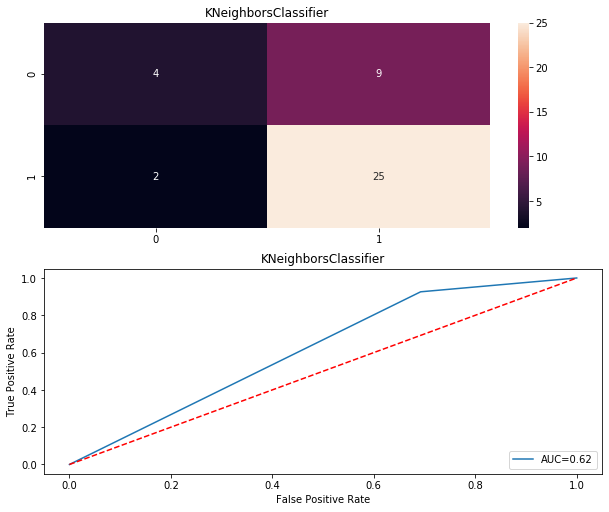

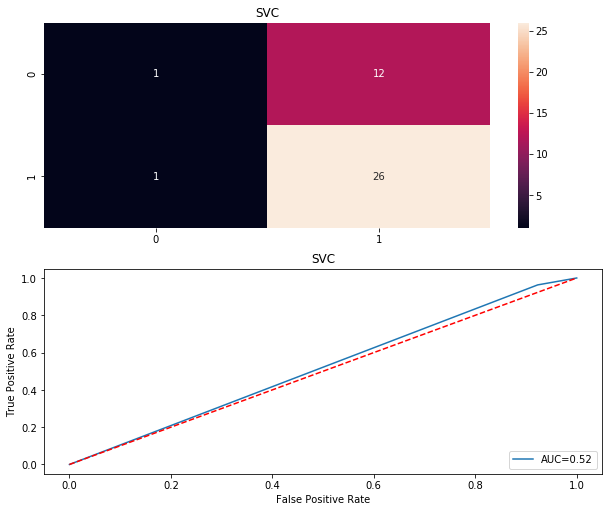

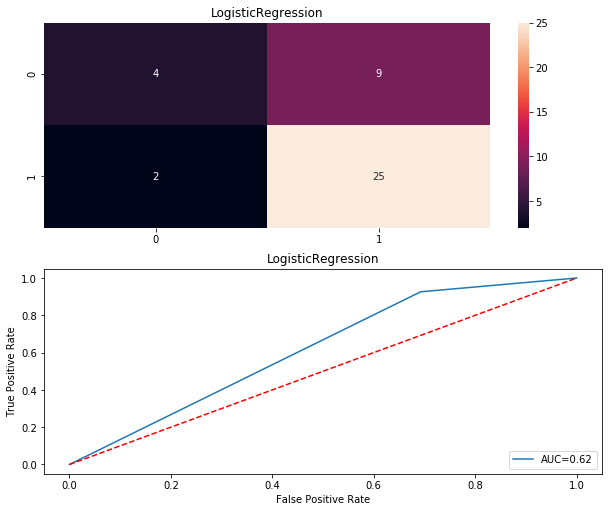

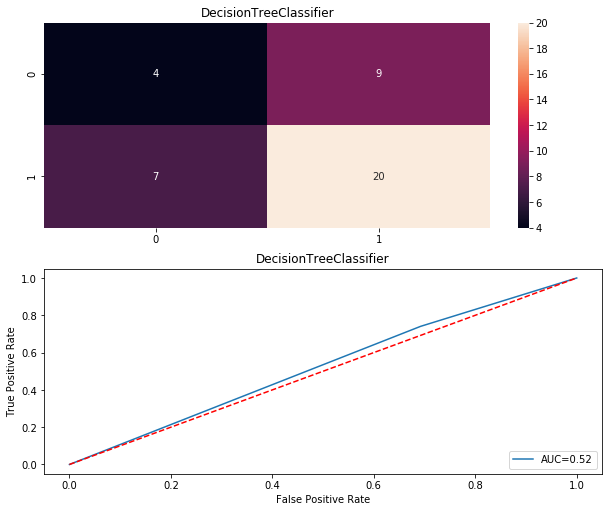

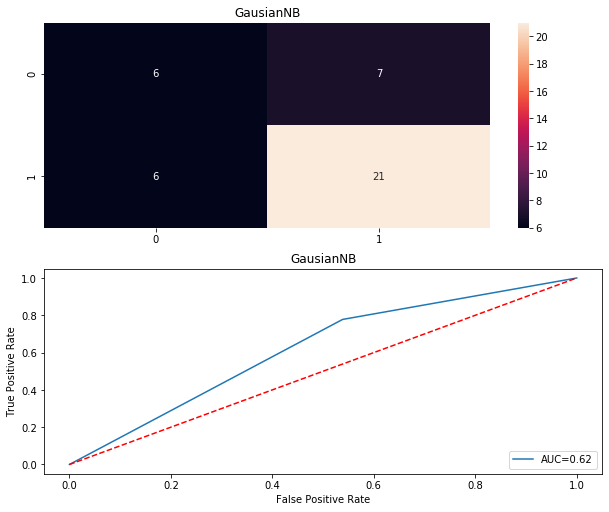

In [92]:
Model=[]
score=[]
cvs=[]
rocscore=[]
for name,model in models:
    print("-----------------------",name,"----------------------")
    print("\n")
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print("\n")
    AS=accuracy_score(y_test,pred)
    print("Accuracy_Score =",AS)
    score.append(AS*100)
    print("\n")
    sc=cross_val_score(model,x,y,cv=5,scoring="accuracy").mean()
    print("Cross_Val_Score =",sc)
    cvs.append(sc*100)
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("roc_auc_score =",roc_auc)
    rocscore.append(roc_auc*100)
    print("\n")
    print("classification_report\n",classification_report(y_test,pred))
    print("\n")
    cm=confusion_matrix(y_test,pred)
    print(cm)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot(false_positive_rate,true_positive_rate,label="AUC=%0.2f"%roc_auc)
    plt.plot([0,1],[0,1],"r--")
    plt.legend(loc="lower right")
    plt.ylabel("True Positive Rate")
    plt.xlabel("False Positive Rate")
    print("\n\n")

In [93]:
result=pd.DataFrame({"Model":Model,"Accuracy_Score":score,"cross_val_score":cvs,"Roc_Auc_Curve":rocscore})
result

,Model,Accuracy_Score,cross_val_score,Roc_Auc_Curve
0,KNeighborsClassifier,72.5,79.534535,61.680912
1,SVC,67.5,75.675676,51.994302
2,LogisticRegression,72.5,78.453453,61.680912
3,DecisionTreeClassifier,60.0,72.357357,52.421652
4,GausianNB,67.5,77.342342,61.965812


In [95]:
# As we see in above models "KNeighborsClassifier" is working well till now. 
# Lets use ensemble techniques
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

70.0
[[ 4  9]
 [ 3 24]]
              precision    recall  f1-score   support

           0       0.57      0.31      0.40        13
           1       0.73      0.89      0.80        27

    accuracy                           0.70        40
   macro avg       0.65      0.60      0.60        40
weighted avg       0.68      0.70      0.67        40



In [96]:
score_rf=cross_val_score(rf,x,y,cv=10,scoring="accuracy")
print("Accuracy_score",score_rf)
print("Mean_scores",score_rf.mean()*100)
print("Standard_Deviation",score_rf.std())

Accuracy_score [0.78947368 0.77777778 0.83333333 0.88888889 0.66666667 0.66666667
 0.77777778 0.77777778 0.77777778 0.55555556]
Mean_scores 75.11695906432749
Standard_Deviation 0.09086419032872219


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,100,500,1000],"base_estimator":[dt,SV]}
clf=GridSearchCV(ada,parameters,cv=5)
clf.fit(x,y)
clf.best_params_

{'base_estimator': DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=None, max_features=None, max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=None, splitter='best'),
 'learning_rate': 1,
 'n_estimators': 100}

In [111]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier(n_estimators=10)
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.625
[[ 3 10]
 [ 5 22]]
              precision    recall  f1-score   support

           0       0.38      0.23      0.29        13
           1       0.69      0.81      0.75        27

    accuracy                           0.62        40
   macro avg       0.53      0.52      0.52        40
weighted avg       0.59      0.62      0.60        40



In [112]:
score_ad=cross_val_score(ad,x,y,cv=10,scoring="accuracy")
print("Accuracy_score",score_ad)
print("Mean_scores",score_ad.mean()*100)
print("Standard_Deviation",score_ad.std())


Accuracy_score [0.78947368 0.72222222 0.77777778 0.83333333 0.66666667 0.72222222
 0.72222222 0.83333333 0.66666667 0.72222222]
Mean_scores 74.56140350877195
Standard_Deviation 0.057447025451428387


In [113]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.65
[[ 3 10]
 [ 4 23]]
              precision    recall  f1-score   support

           0       0.43      0.23      0.30        13
           1       0.70      0.85      0.77        27

    accuracy                           0.65        40
   macro avg       0.56      0.54      0.53        40
weighted avg       0.61      0.65      0.61        40



In [114]:
score_gb=cross_val_score(gb,x,y,cv=10,scoring="accuracy")
print("Accuracy_score",score_gb)
print("Mean_scores",score_gb.mean()*100)
print("Standard_Deviation",score_gb.std())


Accuracy_score [0.84210526 0.83333333 0.72222222 0.88888889 0.61111111 0.83333333
 0.72222222 0.72222222 0.72222222 0.55555556]
Mean_scores 74.53216374269006
Standard_Deviation 0.10081106401015487


after applying so many model I found that model "KNeighborClassifier" (KNN) have maximum Accuracy Score, Cross_val_score. so I choose "KNeighborClassifier" (KNN) because it performs very well on this dataset.

In [115]:
from sklearn.model_selection import cross_val_predict
from sklearn.externals import joblib


In [116]:
joblib.dump(KNN,"KNN_Heart_Disease.pkl")

['KNN_Heart_Disease.pkl']

In [117]:
model=joblib.load("KNN_Heart_Disease.pkl")
model.predict(x_test)

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])